# Dataset Information

| Variable Name | Role      | Type        | Description                                                                                      | Units | Missing Values |
|---------------|-----------|-------------|------------------------------------------------------------------------------------------------|-------|----------------|
| instant       | ID        | Integer     | ID unik untuk setiap catatan data (record index)                                               |       | no             |
| dteday        | Feature   | Date        | Tanggal data direkam                                                                            |       | no             |
| season        | Feature   | Categorical | Musim saat data direkam: 1=winter, 2=spring, 3=summer, 4=fall                                  |       | no             |
| yr            | Feature   | Categorical | Tahun data: 0=2011, 1=2012                                                                     |       | no             |
| mnth          | Feature   | Categorical | Bulan dalam satu tahun (1 sampai 12)                                                           |       | no             |
| holiday       | Feature   | Binary      | 1 jika hari libur, 0 jika bukan                                                                |       | no             |
| weekday       | Feature   | Categorical | Hari dalam minggu (0=Senin sampai 6=Minggu)                                                    |       | no             |
| workingday    | Feature   | Binary      | 1 jika hari kerja, bukan akhir pekan atau libur, 0 jika sebaliknya                              |       | no             |
| weathersit    | Feature   | Categorical | Kondisi cuaca: 1=cerah, 2=kabut/berawan/hujan ringan, 3=Hujan/salju sedang                     |       | no             |
| temp          | Feature   | Continuous  | Suhu udara dinormalisasi (Celsius), (t - t_min)/(t_max - t_min), t_min=-8, t_max=39             | C     | no             |
| atemp         | Feature   | Continuous  | Suhu terasa dinormalisasi (Celsius), t_min=-16, t_max=50                                        | C     | no             |
| hum           | Feature   | Continuous  | Kelembaban udara dinormalisasi (nilai dibagi 100)                                              |       | no             |
| windspeed     | Feature   | Continuous  | Kecepatan angin dinormalisasi (nilai dibagi 67)                                                |       | no             |
| casual        | Other     | Integer     | Jumlah penyewa kasual (non-member)                                                             |       | no             |
| registered    | Other     | Integer     | Jumlah penyewa terdaftar (member)                                                              |       | no             |
| cnt           | Target    | Integer     | Total penyewaan sepeda (casual + registered)                                                   |       | no             |


## Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
df.duplicated().sum()

0

## EDA

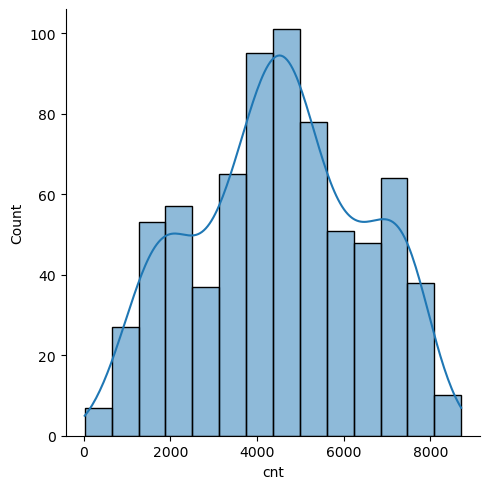

In [8]:
sns.displot(df['cnt'],kde=True)
plt.show()

Histogram variabel 'cnt' menunjukkan karakteristik distribusi multimodal dengan setidaknya tiga puncak yang jelas (sekitar 2000-2500, 4500-5000, dan 7000-7500).

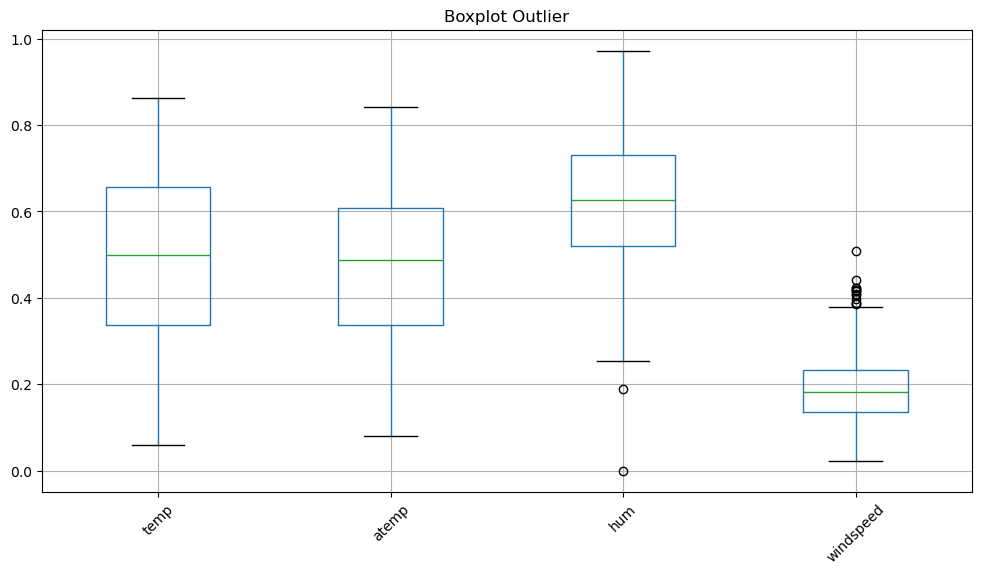

In [34]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed']  

plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.title('Boxplot Outlier')
plt.xticks(rotation=45)
plt.show()

In [9]:
df.drop(columns=['instant', 'casual', 'registered']).corr(numeric_only=True)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.100659


## One Hot Encoding Categorical Column

In [10]:
df = pd.get_dummies(df, columns=['season', 'yr', 'mnth', 'weekday', 'weathersit'], drop_first=True)

## Split Data 

In [11]:
y = df['cnt']

X = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

def is_dummy(col):
    return set(X_train[col].unique()).issubset({0,1})

num_cols_all = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

num_cols = [col for col in num_cols_all if not is_dummy(col)]

print("Kolom numerik yang akan distandarisasi:", num_cols)

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

other_cols = [col for col in X_train.columns if col not in num_cols]

X_train_final = pd.concat([
    pd.DataFrame(X_train_num_scaled, columns=num_cols, index=X_train.index),
    X_train[other_cols]
], axis=1)

X_test_final = pd.concat([
    pd.DataFrame(X_test_num_scaled, columns=num_cols, index=X_test.index),
    X_test[other_cols]
], axis=1)

Kolom numerik yang akan distandarisasi: ['temp', 'atemp', 'hum', 'windspeed']


## Training Model

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train_final,y_train)

LinearRegression()

In [17]:
print(lr.intercept_)

2374.591926270243


In [18]:
coefficient = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coefficient

,Coefficient
holiday,686.298246
workingday,195.466120
temp,-204.787259
atemp,-198.408092
hum,-206.136140
windspeed,348.905685
season_2,951.858211
season_3,819.071721
season_4,1654.242956
yr_1,1981.834582


# 📊 Interpretasi Koefisien pada masing - masing Variabel

## 🗓️ Hari Libur dan Kerja 
| Variabel     | Koefisien | Interpretasi                                                                                                                      |
| ------------ | --------- | --------------------------------------------------------------------------------------------------------------------------------- |
| `holiday`    | +686.30   | Pada hari libur, jumlah pengguna sepeda meningkat rata-rata sebanyak **686 orang** dibanding hari biasa.                          |
| `workingday` | +195.47   | Pada hari kerja, terjadi peningkatan jumlah peminjam sekitar **195 orang**, dibandingkan hari non-kerja (weekend/libur nasional). |

## 🌡️ Kondisi Lingkungan 
| Variabel    | Koefisien | Interpretasi                                                                                                                                 |
| ----------- | --------- | -------------------------------------------------------------------------------------------------------------------------------------------- |
| `temp`      | -204.79   | Setiap kenaikan 1 unit suhu (dalam skala tertentu, biasanya Celcius atau normalisasi), prediksi peminjam menurun **204 orang**.              |
| `atemp`     | -198.41   | Suhu yang dirasakan meningkat 1 unit → penurunan peminjam sebesar **198 orang**.                                                             |
| `hum`       | -206.14   | Kelembapan meningkat 1 unit → peminjam berkurang **206 orang**.                                                                              |
| `windspeed` | +348.91   | Kecepatan angin meningkat 1 unit → jumlah peminjam justru meningkat **349 orang**. |

## 🌼 Musim 
| Variabel   | Koefisien | Interpretasi                                                                                         |
| ---------- | --------- | ---------------------------------------------------------------------------------------------------- |
| `season_2` | +951.86   | Musim ke-2 **Semi** → peningkatan peminjam sebesar **952 orang** dibanding musim ke-1 **Dingin**. |
| `season_3` | +819.07   | Musim ke-3 **Panas** → peningkatan sebesar **819 orang**.                              |
| `season_4` | +1654.24  | Musim ke-4 **Gugur** → peningkatan sangat tinggi yaitu **1654 orang**.                 |

## 📅 Tahun 
| Variabel | Koefisien | Interpretasi                                                                                                                            |
| -------- | --------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| `yr_1`   | +1981.83  | Tahun ke-1 **2012** → peningkatan peminjam sebesar **1982 orang** dibandingkan tahun sebelumnya **2011**. |

## 📅 Bulan 
| Variabel  | Koefisien | Interpretasi                                                                  |
| --------- | --------- | ----------------------------------------------------------------------------- |
| `mnth_2`  | +79.78    | Februari → peningkatan peminjam sebesar **80 orang** dibanding bulan Januari. |
| `mnth_3`  | +578.43   | Maret → peningkatan **578 orang**.                                            |
| `mnth_4`  | +290.19   | April → peningkatan **290 orang**.                                            |
| `mnth_5`  | +540.88   | Mei → peningkatan **541 orang**.                                              |
| `mnth_6`  | +313.36   | Juni → peningkatan **313 orang**.                                             |
| `mnth_7`  | -274.88   | Juli → penurunan **275 orang**.                                               |
| `mnth_8`  | +161.48   | Agustus → peningkatan **161 orang**.                                          |
| `mnth_9`  | +847.68   | September → peningkatan besar yaitu **848 orang**.                            |
| `mnth_10` | +383.09   | Oktober → peningkatan **383 orang**.                                          |
| `mnth_11` | -218.13   | November → penurunan **218 orang**.                                           |
| `mnth_12` | -194.50   | Desember → penurunan **195 orang**.                                           |

## 📅 Hari dalam Minggu 
| Variabel    | Koefisien | Interpretasi                                                           |
| ----------- | --------- | ---------------------------------------------------------------------- |
| `weekday_1` | -58.95    | Hari Senin → penurunan peminjam sebesar **59 orang** dibanding Minggu. |
| `weekday_2` | -33.90    | Hari Selasa → penurunan **34 orang**.                                  |
| `weekday_3` | +71.19    | Hari Rabu → peningkatan **71 orang**.                                  |
| `weekday_4` | +40.55    | Hari Kamis → peningkatan **41 orang**.                                 |
| `weekday_5` | +123.87   | Hari Jumat → peningkatan **124 orang**.                                |
| `weekday_6` | +486.68   | Hari Sabtu → peningkatan besar yaitu **487 orang**.                    |

## ☁️ Kondisi Cuaca 
| Variabel       | Koefisien | Interpretasi                                                                            |
| -------------- | --------- | --------------------------------------------------------------------------------------- |
| `weathersit_2` | -508.44   | Saat cuaca kabut/berawan/hujan ringan → peminjam menurun **508 orang** dibanding cuaca cerah. |
| `weathersit_3` | -1826.37  | Saat cuaca sangat buruk (hujan/salju sedang) → penurunan drastis sebesar **1826 orang**.       |

## Prediction

In [19]:
prediksi = lr.predict(X_test_final)

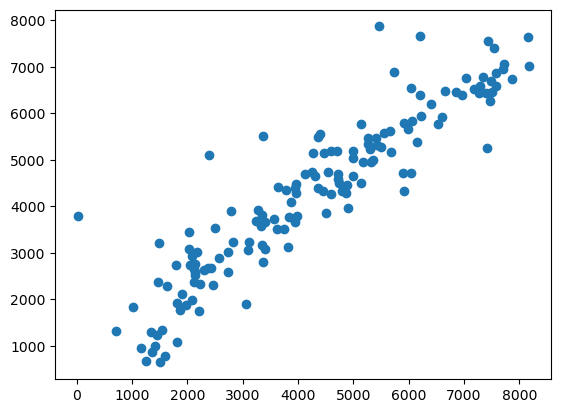

In [20]:
plt.scatter(y_test,prediksi)
plt.show()

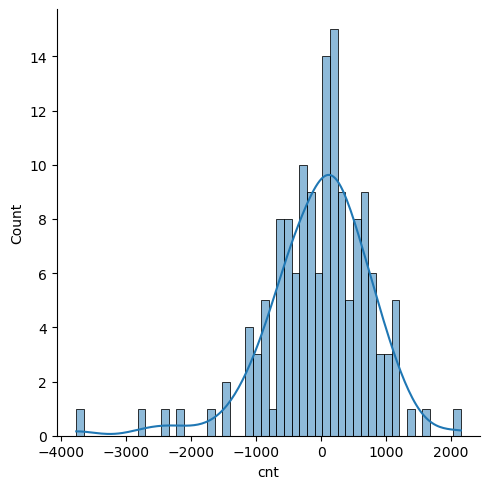

In [21]:
sns.displot((y_test-prediksi),bins=50,kde=True);
plt.show()

Skewness kiri pada residual (nilai aktual - nilai prediksi) bisa disebabkan oleh model yang kesulitan memprediksi cnt di bawah kondisi lingkungan ekstrem yang diwakili oleh outlier pada hum dan windspeed.

## Model Evaluation

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, prediksi))
print('MSE:', metrics.mean_squared_error(y_test, prediksi))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediksi)))

MAE: 583.0197588300691
MSE: 634351.3615248952
RMSE: 796.4617765623753


MAE : Model melakukan kesalahan sekitar 12.94% dari rata-rata jumlah pengguna sepeda

RMSE : Model memiliki rata-rata kesalahan prediksi sekitar 17.7% dari rata-rata pengguna sepeda

In [23]:
r = np.corrcoef(y_test, prediksi)[0, 1]
print(f'R (koefisien korelasi Pearson): {r}')

R (koefisien korelasi Pearson): 0.9182780964380004


In [24]:
r2 = r2_score(y_test, prediksi)
print(f'R² (koefisien determinasi): {r2}')

R² (koefisien determinasi): 0.8418029967286178
